# Makine öğrenmesi odevi 2023-2024
### Öğrenci adı: mawaddah kabawah 
### Öğrenci numara: 2010235510

# konu: kalp hastalığı verisitesi 

* index                     
* Age                       
* Sex                       
* Chest pain type >>	The type of chest pain experienced by the patient.          
* BP >> The blood pressure level of the patient.                  
* Cholesterol  >> The cholesterol level of the patient           
* FBS over 120 >>  The fasting blood sugar test results over 120 mg/d.         
* EKG results  >> The electrocardiogram results of the patient.
* Max HR  >> The maximum heart rate levels achieved during exercise testing.               
* Exercise angina >> The angina experienced during exercise testing.         
* ST depression >> The ST depression on an Electrocardiogram.
* Slope of ST   >> The slope of ST segment electrocardiogram readings.          
* Number of vessels fluro >> The amount vessels seen in Fluoroscopy images.   
* Thallium >> The Thallium Stress test findings.                
* Heart Disease >> Whether or not the patient has been diagnosed with Heart Disease.           

# Veri hazırlık süreci



## Genel bakış atıyoruz ve varsa gereksiz bilgileri tespit ederiz.

In [162]:
import pandas as pd
import numpy as np

df=pd.read_csv("Heart_Disease_Predictionn.csv",sep=";")
print(df.head())

   index   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  \
0      0  70.0    1                4  130          322             0   
1      1  67.0    0                3  115          564             0   
2      2  57.0    1                2  124          261             0   
3      3  64.0    1                4  128          263             0   
4      4  74.0    0                2  120          269             0   

   EKG results  Max HR  Exercise angina  ST depression  Slope of ST  \
0            2     109                0            2.4            2   
1            2     160                0            1.6            2   
2            0     141                0            0.3            1   
3            0     105                1            0.2            2   
4            0     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0        

In [163]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    270 non-null    int64  
 1   Age                      268 non-null    float64
 2   Sex                      270 non-null    int64  
 3   Chest pain type          270 non-null    int64  
 4   BP                       270 non-null    int64  
 5   Cholesterol              270 non-null    int64  
 6   FBS over 120             270 non-null    int64  
 7   EKG results              270 non-null    int64  
 8   Max HR                   270 non-null    int64  
 9   Exercise angina          270 non-null    int64  
 10  ST depression            270 non-null    float64
 11  Slope of ST              270 non-null    int64  
 12  Number of vessels fluro  270 non-null    int64  
 13  Thallium                 270 non-null    int64  
 14  Heart Disease            2

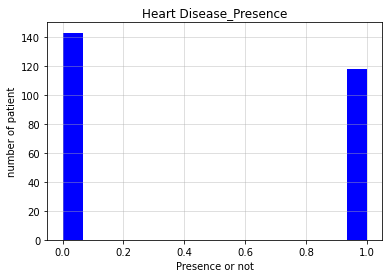

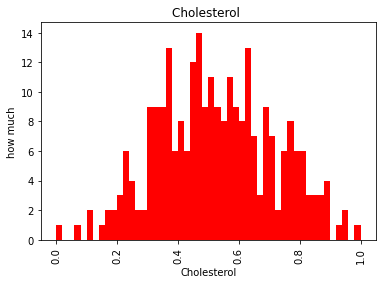

In [164]:
plt.hist(dfNew['Heart Disease_Presence'],color='blue',bins =15)
plt.title("Heart Disease_Presence")
plt.xlabel("Presence or not")
plt.ylabel("number of patient")
plt.grid(alpha=0.5)
plt.show()


plt.hist(dfNew['Cholesterol'],color='red',bins = 50)
plt.title("Cholesterol ")
plt.tick_params(axis='x', rotation=90)
plt.xlabel("Cholesterol")
plt.ylabel("how much")
plt.show()

## Özellik seçimi
 
### 'index' gereksiz görünüyor.

In [165]:
df.drop("index",axis=1,inplace=True)

In [166]:
print(df)

      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0    70.0    1                4  130          322             0            2   
1    67.0    0                3  115          564             0            2   
2    57.0    1                2  124          261             0            0   
3    64.0    1                4  128          263             0            0   
4    74.0    0                2  120          269             0            0   
..    ...  ...              ...  ...          ...           ...          ...   
265  52.0    1                3  172          199             1            0   
266  44.0    1                2  120          263             0            0   
267  56.0    0                2  140          294             0            2   
268  57.0    1                4  140          192             0            0   
269  67.0    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depres

# Veri temizliği ve dönüşümü
## Kayıp verilerin tespiti ve dönüşümü

In [167]:
print(df["Age"])
print(df["Age"].isnull())

0      70.0
1      67.0
2      57.0
3      64.0
4      74.0
       ... 
265    52.0
266    44.0
267    56.0
268    57.0
269    67.0
Name: Age, Length: 270, dtype: float64
0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Name: Age, Length: 270, dtype: bool


In [168]:
print(df.isnull().sum())

Age                        2
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


In [169]:
print(df.isnull().sum().sum())

2


In [170]:
df.dropna(inplace=True)
print(df)

      Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0    70.0    1                4  130          322             0            2   
1    67.0    0                3  115          564             0            2   
2    57.0    1                2  124          261             0            0   
3    64.0    1                4  128          263             0            0   
4    74.0    0                2  120          269             0            0   
..    ...  ...              ...  ...          ...           ...          ...   
265  52.0    1                3  172          199             1            0   
266  44.0    1                2  120          263             0            0   
267  56.0    0                2  140          294             0            2   
268  57.0    1                4  140          192             0            0   
269  67.0    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depres

In [171]:
print(df.isnull().sum().sum())

0


## Veri tiplerinin dönüşümü 
### 'Age' int Olması gerekiyor

In [172]:
print(df.dtypes)


donusum={"Age":int}

df=df.astype(donusum)
print(df.dtypes)

Age                        float64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object
Age                          int32
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype:

## Tekrarlayan verilerin kaldırılması

In [173]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
265    False
266    False
267    False
268    False
269    False
Length: 268, dtype: bool


In [174]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium, Heart Disease]
Index: []


## Kategorik verilerin dönüşümü
### Heart disease kategorik veri

In [175]:
df=pd.get_dummies(df,columns=["Heart Disease"])
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            0   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [176]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 0 to 269
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      268 non-null    int32  
 1   Sex                      268 non-null    int64  
 2   Chest pain type          268 non-null    int64  
 3   BP                       268 non-null    int64  
 4   Cholesterol              268 non-null    int64  
 5   FBS over 120             268 non-null    int64  
 6   EKG results              268 non-null    int64  
 7   Max HR                   268 non-null    int64  
 8   Exercise angina          268 non-null    int64  
 9   ST depression            268 non-null    float64
 10  Slope of ST              268 non-null    int64  
 11  Number of vessels fluro  268 non-null    int64  
 12  Thallium                 268 non-null    int64  
 13  Heart Disease_Absence    268 non-null    uint8  
 14  Heart Disease_Presence   2

In [177]:
df.reset_index(inplace=True,drop=True)
print(df)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            0   
..   ...  ...              ...  ...          ...           ...          ...   
263   52    1                3  172          199             1            0   
264   44    1                2  120          263             0            0   
265   56    0                2  140          294             0            2   
266   57    1                4  140          192             0            0   
267   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

# Normalizasyon 
### daha verimli bir sonuç almamızı sağlar.


In [178]:
dfScaler=df.loc[:,'Chest pain type':'Thallium']
x=(dfScaler-np.min(dfScaler))/(np.max(dfScaler)-np.min(dfScaler))
print(x)

     Chest pain type        BP  Cholesterol  FBS over 120  EKG results  \
0           1.000000  0.339623     0.447489           0.0          1.0   
1           0.666667  0.198113     1.000000           0.0          1.0   
2           0.333333  0.283019     0.308219           0.0          0.0   
3           1.000000  0.320755     0.312785           0.0          0.0   
4           0.333333  0.245283     0.326484           0.0          0.0   
..               ...       ...          ...           ...          ...   
263         0.666667  0.735849     0.166667           1.0          0.0   
264         0.333333  0.245283     0.312785           0.0          0.0   
265         0.333333  0.433962     0.383562           0.0          1.0   
266         1.000000  0.433962     0.150685           0.0          0.0   
267         1.000000  0.622642     0.365297           0.0          1.0   

       Max HR  Exercise angina  ST depression  Slope of ST  \
0    0.290076              0.0       0.387097    

C:\Users\Work\OneDrive\sss\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Work\OneDrive\sss\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


## Özellik mühendisliği

In [179]:
dfNew=pd.concat([df.loc[:,["Age",'Sex','Heart Disease_Absence','Heart Disease_Presence']],x],axis=1)
print(dfNew)

     Age  Sex  Heart Disease_Absence  Heart Disease_Presence  Chest pain type  \
0     70    1                      0                       1         1.000000   
1     67    0                      1                       0         0.666667   
2     57    1                      0                       1         0.333333   
3     64    1                      1                       0         1.000000   
4     74    0                      1                       0         0.333333   
..   ...  ...                    ...                     ...              ...   
263   52    1                      1                       0         0.666667   
264   44    1                      1                       0         0.333333   
265   56    0                      1                       0         0.333333   
266   57    1                      1                       0         1.000000   
267   67    1                      0                       1         1.000000   

           BP  Cholesterol 

In [180]:
dfNew.to_csv("Heart_Disease_Predictionn.csv",sep=";")

# Regresyon

## Multiple linear regresyon

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df=pd.read_csv("Heart_Disease_Predictionn.csv",sep=";")
print(df.head())

   Unnamed: 0  Age  Sex  Heart Disease_Absence  Heart Disease_Presence  \
0           0   70    1                      0                       1   
1           1   67    0                      1                       0   
2           2   57    1                      0                       1   
3           3   64    1                      1                       0   
4           4   74    0                      1                       0   

   Chest pain type        BP  Cholesterol  FBS over 120  EKG results  \
0         1.000000  0.339623     0.447489           0.0          1.0   
1         0.666667  0.198113     1.000000           0.0          1.0   
2         0.333333  0.283019     0.308219           0.0          0.0   
3         1.000000  0.320755     0.312785           0.0          0.0   
4         0.333333  0.245283     0.326484           0.0          0.0   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0  0.290076              0.0       0.387097          0.5   
1 

mlr=LinearRegression()

In [182]:
mlr=LinearRegression()

In [183]:
x = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']]
y = df['Heart Disease_Presence']

In [184]:
mlr.fit(x,y)

LinearRegression()

# b0 b1 bulması

In [185]:
print(mlr.intercept_,mlr.coef_)

-0.029494337483346345 [-0.00163062  0.15653292  0.26797528  0.18300614  0.25174425 -0.08469258
  0.08123872 -0.34494949  0.12672294  0.25645763  0.09055488  0.40844982
  0.24745548]


In [196]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

mlr_pred=mlr.predict(x)
print("Multiple Linear Regression:")
print("mlr r2:",r2_score(y,mlr_pred))
print("mlr mae:",mean_absolute_error(y,mlr_pred))
print("mlr mse:",mean_squared_error(y,mlr_pred))
print("mlr mape:",mean_absolute_percentage_error(y,mlr_pred))

Multiple Linear Regression:
mlr r2: 0.5457201960063764
mlr mae: 0.26080395512723215
mlr mse: 0.11233027008975767
mlr mape: 571049947082328.4


## Polynominal linear regresyon

In [197]:
from sklearn.preprocessing import PolynomialFeatures
plr=PolynomialFeatures(degree=3)

x_pol=plr.fit_transform(x)
lr_pol=LinearRegression()
lr_pol.fit(x_pol,y)

LinearRegression()

In [198]:
pol_pred=lr_pol.predict(x_pol)
print(" Polynominal linear regresyon:")
print("pol r2:",r2_score(y,pol_pred))
print("pol mae:",mean_absolute_error(y,pol_pred))
print("pol mse:",mean_squared_error(y,pol_pred))
print("pol mape:",mean_absolute_percentage_error(y,pol_pred))


 Polynominal linear regresyon:
pol r2: 1.0
pol mae: 1.3997767290216691e-11
pol mse: 3.1366961130200743e-22
pol mape: 35067.835820895525


## Decision tree
 * Tahmin yaparken, bu ağaçı kullanarak sonuca ulaşır.

In [199]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

df=pd.read_csv("Heart_Disease_Predictionn.csv",sep=";")

x = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']]
y = df['Heart Disease_Presence']

In [200]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)

tree_pred=tree_reg.predict(x)
print("Decision Tree Regression:")
print("tree r2:",r2_score(y,tree_pred))
print("tree mae:",mean_absolute_error(y,tree_pred))
print("tree mse:",mean_squared_error(y,tree_pred))
print("tree mape:",mean_absolute_percentage_error(y,tree_pred))

Decision Tree Regression:
tree r2: 1.0
tree mae: 0.0
tree mse: 0.0
tree mape: 0.0


## Random forest

* birden fazla karar ağacını kullanarak daha uyumlu modeller üreterek isabetli tahminlerde bulunmaya yarayan bir regresyon modelidir

In [201]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x,y)
rf_pred=rf.predict(x)
print(" Random Forest Regression:")
print("rf r2:",r2_score(y,rf_pred))
print("rf mae:",mean_absolute_error(y,rf_pred))
print("rf mse:",mean_squared_error(y,rf_pred))
print("rf mape:",mean_absolute_percentage_error(y,rf_pred))

 Random Forest Regression:
rf r2: 0.9198338963963965
rf mae: 0.09936567164179105
rf mse: 0.019822761194029852
rf mape: 223499533746371.66


## Train test split
* Belirli probleme ait veriyi makineye öğretmek (train), ne kadar doğru öğrendiğini skorlamak (test) ve seçilen algoritma doğrultusunda daha önce görmediği veri girdi olarak verildiğinde çıktısının ne olacağını en yüksek doğruluk ile tahmin ettirebiliriz.

In [202]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


mlr=LinearRegression()
mlr.fit(x_train,y_train)
mlr_pred=mlr.predict(x_test)

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [203]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("mlr:","r2:",r2_score(y_test,mlr_pred),"mae:",mean_absolute_error(y_test,mlr_pred))
print("dt:","r2:",r2_score(y_test,dt_pred),"mae:",mean_absolute_error(y_test,dt_pred))
print("rf:","r2:",r2_score(y_test,rf_pred),"mae:",mean_absolute_error(y_test,rf_pred))

mlr: r2: 0.5428718168285978 mae: 0.26811548062040713
dt: r2: 0.40000000000000013 mae: 0.14814814814814814
rf: r2: 0.57823 mae: 0.21407407407407406


# yorum:
* MSE değeri modelin ortalama kare hatasıdır.Ne kadar az o kadar iyi.
* RMSE=Kök ortalama kare hata
* Bu değerler gösteriyor ki düşük bir MSE değeri modelin gerçek değerlere ne kadar yakın tahmin yaptığını gösterir.
* r2_score, modelin bağımsız değişkenlerinin varyansının.